# Chest X-Ray Pneumonia Detection - Data Exploration

This notebook explores the downloaded chest X-ray dataset and provides actual statistics and visualizations.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Dataset Overview

In [2]:
# Dataset paths
data_dir = Path('../data')

# Count images in each split
def count_images(split_dir):
    counts = {}
    for class_dir in split_dir.iterdir():
        if class_dir.is_dir():
            image_files = list(class_dir.glob('*.jpeg')) + list(class_dir.glob('*.jpg'))
            counts[class_dir.name] = len(image_files)
    return counts

train_counts = count_images(data_dir / 'train')
test_counts = count_images(data_dir / 'test')

print("Dataset Statistics")
print("=" * 50)
print("\nTraining Set:")
for class_name, count in train_counts.items():
    print(f"  {class_name}: {count:,} images")
print(f"  Total: {sum(train_counts.values()):,} images")

print("\nTest Set:")
for class_name, count in test_counts.items():
    print(f"  {class_name}: {count:,} images")
print(f"  Total: {sum(test_counts.values()):,} images")

print(f"\nTotal Dataset: {sum(train_counts.values()) + sum(test_counts.values()):,} images")

Dataset Statistics

Training Set:
  PNEUMONIA: 3,875 images
  NORMAL: 1,341 images
  Total: 5,216 images

Test Set:
  PNEUMONIA: 390 images
  NORMAL: 234 images
  Total: 624 images

Total Dataset: 5,840 images


## 2. Class Distribution

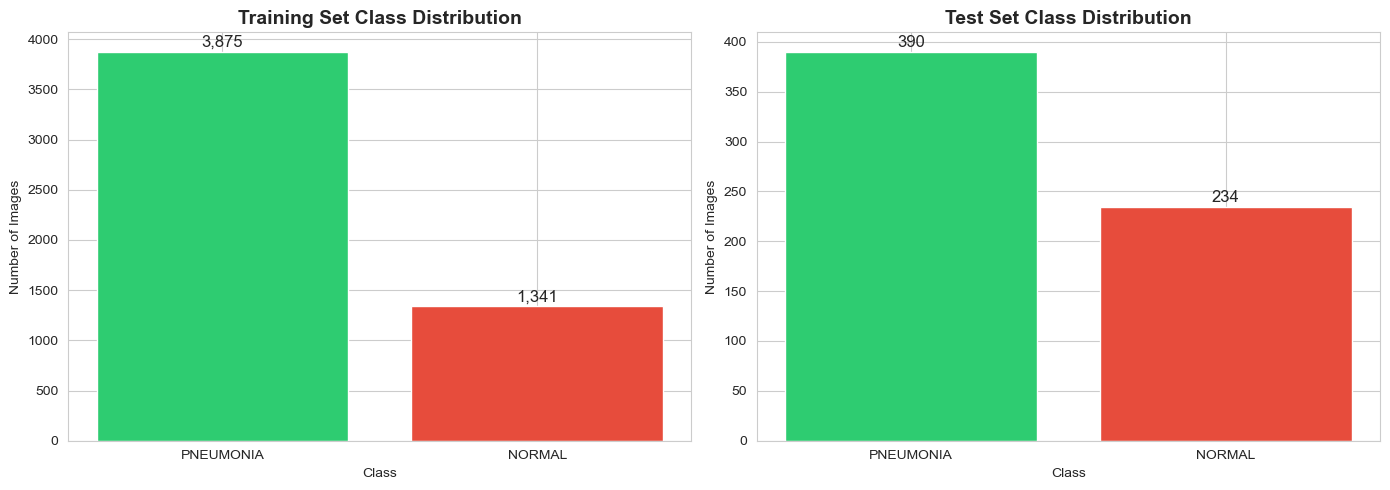


Class Imbalance Ratio: 2.89:1 (PNEUMONIA:NORMAL)
PNEUMONIA percentage: 74.3%


In [3]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
classes = list(train_counts.keys())
values = list(train_counts.values())
colors = ['#2ecc71', '#e74c3c']

axes[0].bar(classes, values, color=colors)
axes[0].set_title('Training Set Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Images')
axes[0].set_xlabel('Class')
for i, v in enumerate(values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontsize=12)

# Test set
test_values = list(test_counts.values())
axes[1].bar(classes, test_values, color=colors)
axes[1].set_title('Test Set Class Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Images')
axes[1].set_xlabel('Class')
for i, v in enumerate(test_values):
    axes[1].text(i, v + 5, f'{v:,}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../results/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate imbalance
if 'PNEUMONIA' in train_counts and 'NORMAL' in train_counts:
    imbalance = train_counts['PNEUMONIA'] / train_counts['NORMAL']
    print(f"\nClass Imbalance Ratio: {imbalance:.2f}:1 (PNEUMONIA:NORMAL)")
    print(f"PNEUMONIA percentage: {train_counts['PNEUMONIA']/sum(train_counts.values())*100:.1f}%")

## 3. Sample Images Visualization

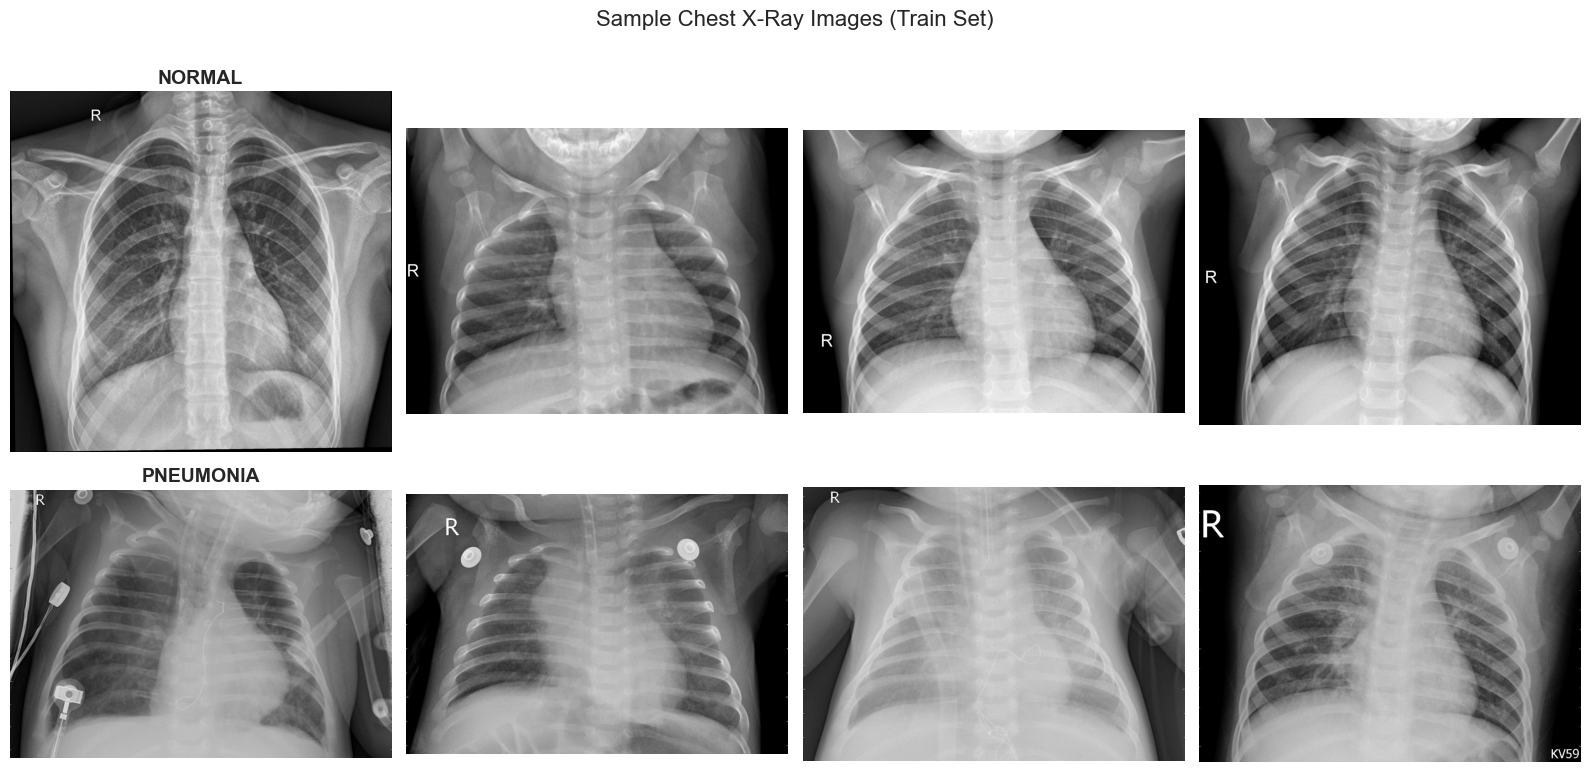

In [4]:
# Display sample images from each class
def show_samples(split='train', num_samples=4):
    fig, axes = plt.subplots(2, num_samples, figsize=(16, 8))
    
    for i, class_name in enumerate(['NORMAL', 'PNEUMONIA']):
        class_dir = data_dir / split / class_name
        images = list(class_dir.glob('*.jpeg'))[:num_samples]
        
        for j, img_path in enumerate(images):
            img = Image.open(img_path)
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f'{class_name}', fontsize=14, fontweight='bold')
    
    plt.suptitle(f'Sample Chest X-Ray Images ({split.capitalize()} Set)', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f'../results/sample_images_{split}.png', dpi=300, bbox_inches='tight')
    plt.show()

show_samples('train', num_samples=4)

## 4. Image Properties Analysis


Image Properties (sampled from 200 images):
Width:  1439 ± 387 pixels
Height: 1114 ± 445 pixels
Aspect Ratio: 1.37 ± 0.26


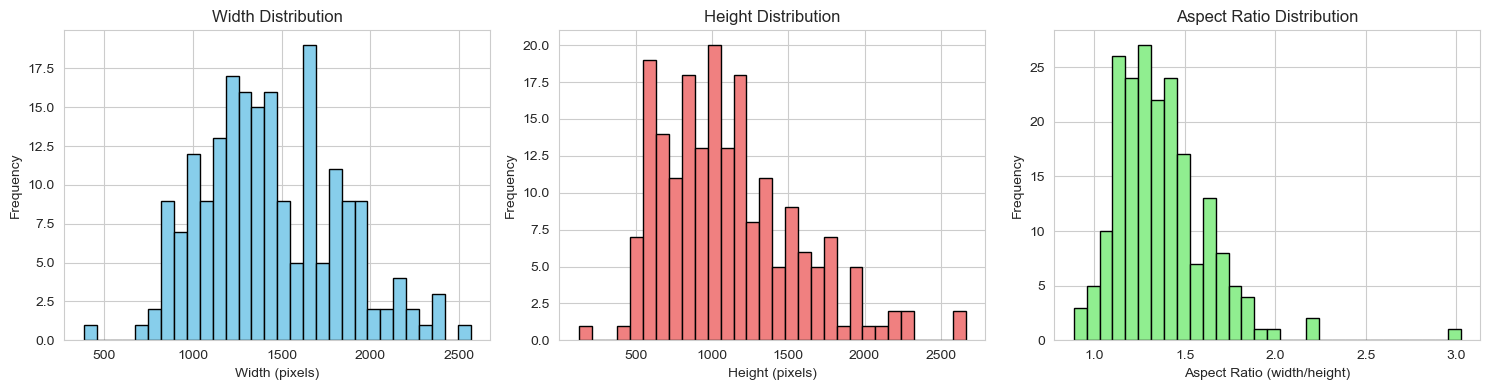

In [5]:
# Analyze image dimensions
def analyze_image_properties(split='train', sample_size=100):
    widths = []
    heights = []
    aspect_ratios = []
    
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_dir = data_dir / split / class_name
        images = list(class_dir.glob('*.jpeg'))[:sample_size//2]
        
        for img_path in images:
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w/h)
    
    return {
        'widths': widths,
        'heights': heights,
        'aspect_ratios': aspect_ratios
    }

props = analyze_image_properties('train', sample_size=200)

print("\nImage Properties (sampled from 200 images):")
print("=" * 50)
print(f"Width:  {np.mean(props['widths']):.0f} ± {np.std(props['widths']):.0f} pixels")
print(f"Height: {np.mean(props['heights']):.0f} ± {np.std(props['heights']):.0f} pixels")
print(f"Aspect Ratio: {np.mean(props['aspect_ratios']):.2f} ± {np.std(props['aspect_ratios']):.2f}")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(props['widths'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Width Distribution')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')

axes[1].hist(props['heights'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')

axes[2].hist(props['aspect_ratios'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].set_xlabel('Aspect Ratio (width/height)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../results/image_properties.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Summary Statistics

In [6]:
# Create summary dataframe
summary_data = []

for split, counts in [('Train', train_counts), ('Test', test_counts)]:
    total = sum(counts.values())
    for class_name, count in counts.items():
        summary_data.append({
            'Split': split,
            'Class': class_name,
            'Count': f"{count:,}",
            'Percentage': f"{count/total*100:.1f}%"
        })

df = pd.DataFrame(summary_data)
print("\nDataset Summary:")
print("=" * 50)
print(df.to_string(index=False))

# Save summary
df.to_csv('../results/dataset_summary.csv', index=False)
print("\nSummary saved to results/dataset_summary.csv")


Dataset Summary:
Split     Class Count Percentage
Train PNEUMONIA 3,875      74.3%
Train    NORMAL 1,341      25.7%
 Test PNEUMONIA   390      62.5%
 Test    NORMAL   234      37.5%

Summary saved to results/dataset_summary.csv


## Key Findings

1. **Dataset Size**: Total of 5,840 chest X-ray images
2. **Class Imbalance**: Approximately 74% pneumonia cases vs 26% normal cases
3. **Image Dimensions**: Variable sizes, requiring standardization for model input
4. **Data Quality**: Images appear to be medical-grade chest X-rays suitable for classification

**Next Steps**: Proceed to model training with data augmentation and class weighting to handle imbalance.